# `Matplotlib` 資料視覺化

`matplotlib` 幾乎是標準 Python 畫圖套件了! 在有 `matplotlib` 之前, Python 要畫圖不那麼方便, 和 Python 很多套件一樣, 有許多方案, 但各家有不同的優缺點, 也沒有一套是大家都在用的。

而 `matplotlib` 仿 Matlab 式的畫圖方式, 讓很多人很快入手、並且功能相當完整。原作者是 John D. Hunter, 和很多 Python 的套件作者一樣, 他有博士學位。非常令人遺憾的是他在 2012 年因大腸直腸癌治療併發症過逝, 過逝時才 44 歲!


In [12]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1 畫個函數

前面說過 `plt.plot` 的基本用法是

    plt.plot(X,Y)

其中 X, Y 是分別是點 x 座標, y 座標形的的 list 或 array。

### 【重點】標準函數畫法

函數畫圖其實就是描點法, 而且再次用到陣列導向計算的概念。

我們先牛刀小試, 畫個 $\sin$ 的圖。

$$f(x) = \sin(x)$$

先來設個 x 的範圍, 就 -10 到 10, 給 100 個點。

In [14]:
x=np.linspace(-10,10,100)
y=np.sin(x)

y 自然是 $\sin(x)$。

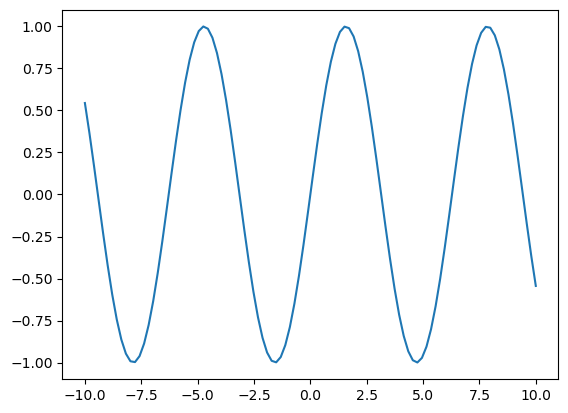

In [15]:
plt.plot(x,y)

畫圖!

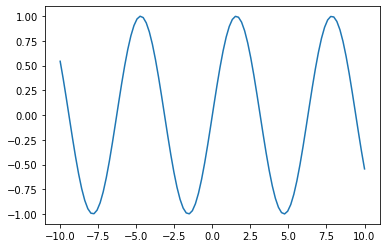

### 【練習】函數畫圖

這次我們來畫:

$$f(x) = \frac{\sin(5x)}{1+x^2}$$

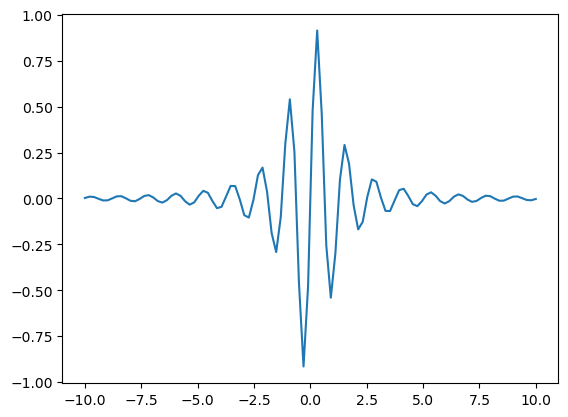

In [18]:
x=np.linspace(-10,10,100)
y=(np.sin(5*x))/(1+x**2)
plt.plot(x,y)

## 2 快速改變風格

雖然 `matplotlib` 在很辛苦的調校之後也是可以畫美美的圖, 不過它比較是「讓我們快速看到結果」的套件。所以它有些快速基本修飾功能。

### 【技巧】快速改變顏色

![快取色彩](images/color.png)

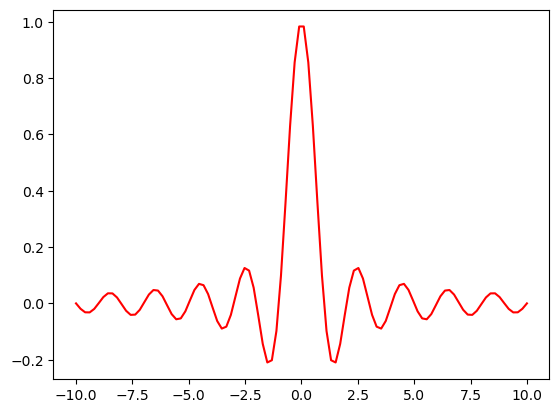

In [20]:
x=np.linspace(-10,10,100)
y=np.sinc(x)
plt.plot(x,y,'r')


### 【技巧】快速改變線條風格

快速改變線條風格, 還可和顏色混用。

| 參數 | 說明 |
|---|---|
| `--` | dash |
| `-.` | 點 + dash |
| `:` | 點點 |
| `o` | 大點點 |
| `^` | 三角 |
| `s` | 方塊 |

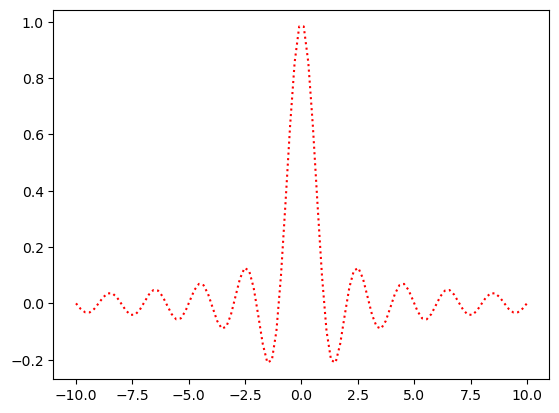

In [26]:
plt.plot(x,y,':r')


## 3 基本的修飾

| 參數 | 說明 |
|---|---|
| `alpha` | 透明度 |
| `color` (`c`)| 顏色 |
| `linestyle` (`ls`) | 線條風格 |
| `linewidth` (`lw`) | 線寬 |

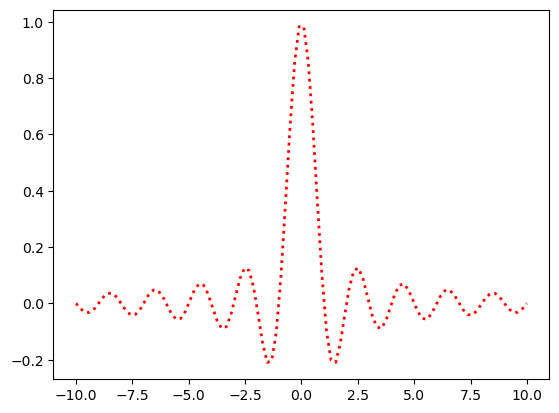

In [32]:
plt.plot(x,y,c='r',ls=":",lw=2)


## 4 如果畫個參數式圖形

其實參數式圖形基本上也是一堆 x, y 的座標, 只是 x(t), y(t) 都是 t 的函數, 我們可以想成 t 是時間。

假設我們的

$$ -2\pi \leq t \leq 2\pi$$

要畫個半徑是 r 的圓, x(t), y(t) 就是這樣:

* $x(t) = r\cos(t)$
* $y(t) = r\sin(t)$

我們來試試事情是不是如我們想的這樣...

In [35]:
r=3
t=np.linspace(-2*np.pi,2*np.pi,200)

In [36]:
x=r*np.cos(t)
y=r*np.sin(t)

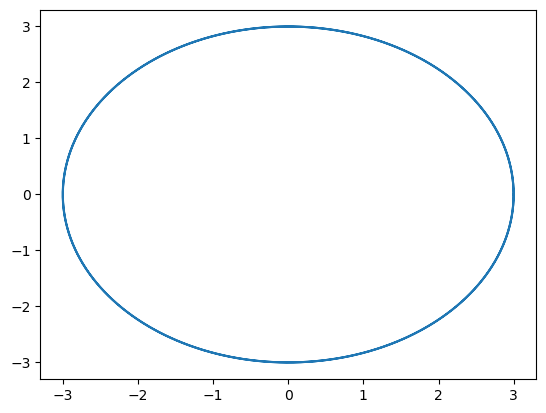

In [38]:
plt.plot(x,y)

真的成功了... 等等, `matplotlib` 怎麼畫成橢圓呢? 我們來調整一下。

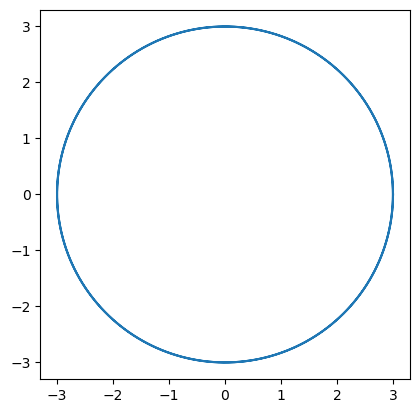

In [39]:
#gca get current axis
ax=plt.gca()
ax.set_aspect("equal")
plt.plot(x,y)

再來我們可以想一下, 如果 r 不是故定的呢? 也就是它會變長變短, 是不是會畫出很多特別的圖呢? 其實很多特別的曲線不過就是找個試合的 r(t), 我們來隨意試試看。

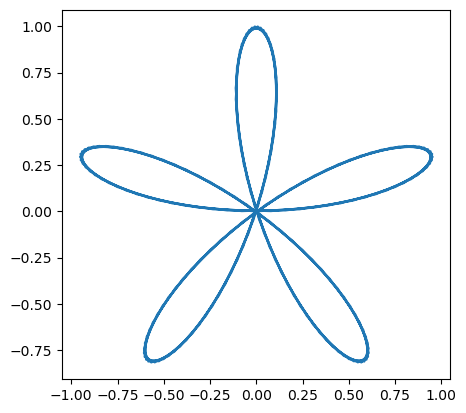

In [41]:

t=np.linspace(-2*np.pi,2*np.pi,200)
r=np.sin(5*t)
x=r*np.cos(t)
y=r*np.sin(t)
ax=plt.gca()
ax.set_aspect("equal")
plt.plot(x,y)

是不是很有意思呢? 你也可以自己試試不同的變化。

## 5 `subplot` 畫多個圖

我們每次畫圖的時候, `matplotlib` 就弄 1 個 figure 畫圖區出來, 裡面可以有很多子圖, 在 figure 裡叫 axes。目前我們都只有 1 個 figure 內含 1 張圖, 所以都不用設, 現在我想畫 4 張圖時。我們就要先想好「陣式」。

比如說 2x2 這樣排列的 4 張圖。

<BarContainer object of 10 artists>

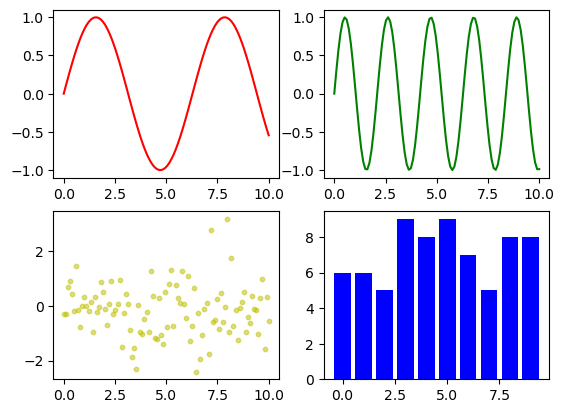

In [59]:
x=np.linspace(0,10,100)
plt.subplot(2,2,1)
plt.plot(x,np.sin(x),c="r")
plt.subplot(2,2,2)
plt.plot(x,np.sin(3*x),c="g")
plt.subplot(2,2,3)
plt.scatter(x,np.random.randn(100),c="y",s=10,alpha=0.5)
plt.subplot(2,2,4)
plt.bar(range(10),np.random.randint(5,10,10),fc='b')

## 6 進階色彩*

#### 顏色表示法 1

    c = 'r' 

可以用 blue (b), green (g), red (r), cyan (c), magenta (m), yellow (y), black (k), white (w)


#### 顏色表示法 2

用一個 0 到 1 的數字表灰階, 越大越白。

    c = '0.6'
    
#### 顏色表示法 3

網頁常用的標準 16 進位 RGB 表示法。

    c = '#00a676'
    
我們怎知哪裡可選顏色呢? 可以用之前彥良介紹的 [Coolors.co](https://coolors.co) 等。
    
#### 顏色表示法 4

用 0-1 的數字表 RGB 也可以。

    c=(0.7, 0.4, 1)

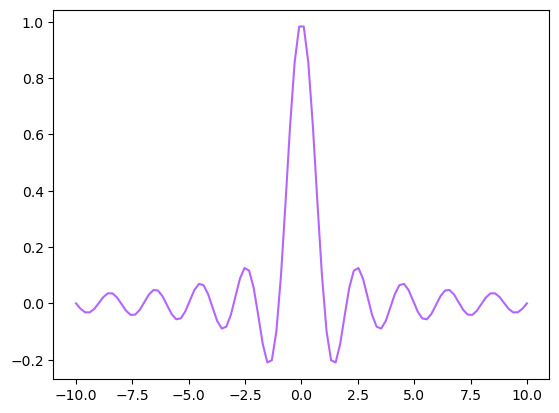

In [60]:

x=np.linspace(-10,10,100)
y=np.sinc(x)
plt.plot(x,y,c=(0.7,0.4,1))

## 7 Marker*

所謂 'marker' 就是原來的點, 我們特別標示出來, 為了不要讓圖形太複雜, 我們新換個點比較少的例子。

In [82]:
x=range(20)
y=np.random.randn(20)

array([-0.66165306,  0.84689912,  0.81418848, -0.96292637,  0.11524915,
        1.58575978,  1.62178884, -0.92307498, -1.88888376, -1.06603042,
        0.30430068, -0.40247053, -1.32602834,  0.43995204, -1.36027895,
        0.44856668,  0.20614882,  1.28960471,  2.42734386,  0.09719761])

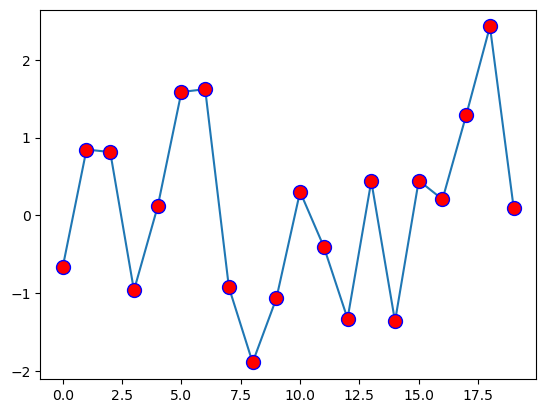

In [97]:
plt.plot(x,y,marker="o",mec="b",mfc="r",ms=10)

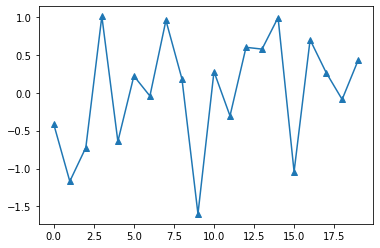

#### marker 可以設的參數

| 參數 | 說明 |
|---|---|
| `marker` | marker 的風格 |
| `markeredgecolor` (`mec`) | 邊線顏色 |
| `markeredgewidth` (`mew`) | 邊線寬度 |
| `markerfacecolor` (`mfc`) | marker 的顏色 |
| `markerfacecoloralt` (`mfcalt`) | marker 替換色 |
| `markersize` (`ms`) | marker 大小 |
| `markevery` | 隔多少畫一個 marker |

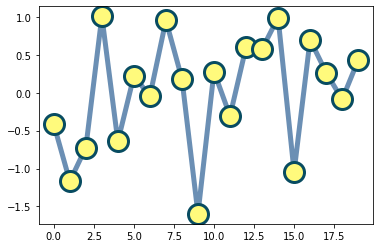

比較奇特的參數是 `markevery`, 這是說我們每多少筆資料要畫一個 marker。為了示範, 我們拿之前的例子來看看。

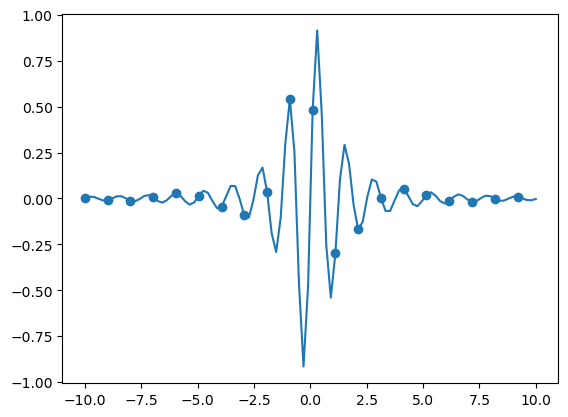

In [101]:
x=np.linspace(-10,10,100)
y=(np.sin(5*x))/(1+x**2)
plt.plot(x,y,marker="o",markevery=5)

後面的完完全全連在一起了, 我們現在隔 10 個畫一個 marker 試試。

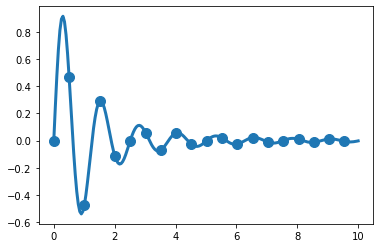

## 8 bar 風*

<BarContainer object of 5 artists>

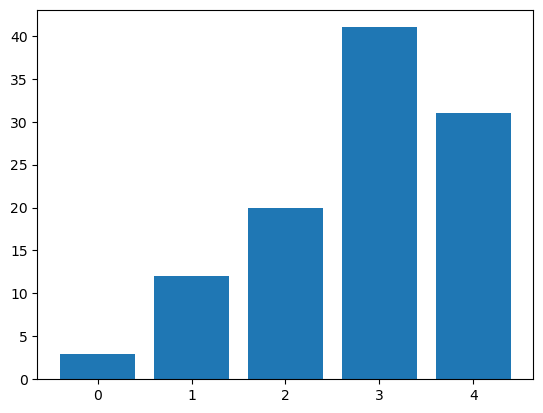

In [103]:
plt.bar(range(5),np.random.randint(1,50,5))

移一點點。

<BarContainer object of 5 artists>

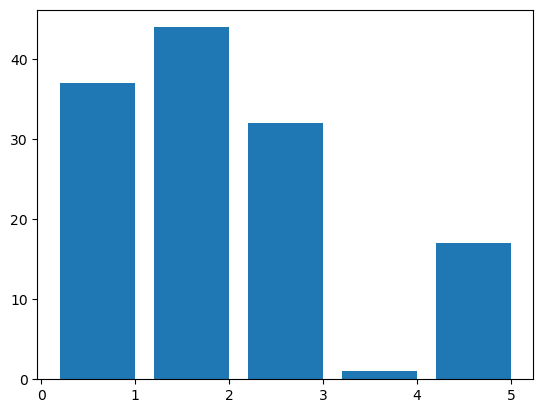

In [114]:
plt.bar(np.arange(0.6,5,1),np.random.randint(1,50,5))


#### 雙色的長條圖

<BarContainer object of 5 artists>

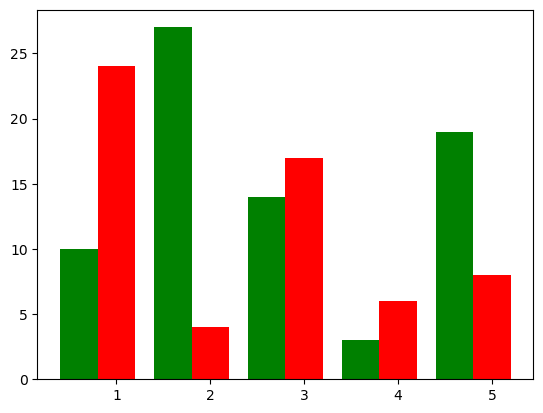

In [121]:
x=np.arange(1,6)
plt.bar(x-0.4,np.random.randint(1,30,5),width=0.4,fc='g')
plt.bar(x,np.random.randint(1,30,5),width=0.4,fc='r')

#### 疊加型的資料

<BarContainer object of 5 artists>

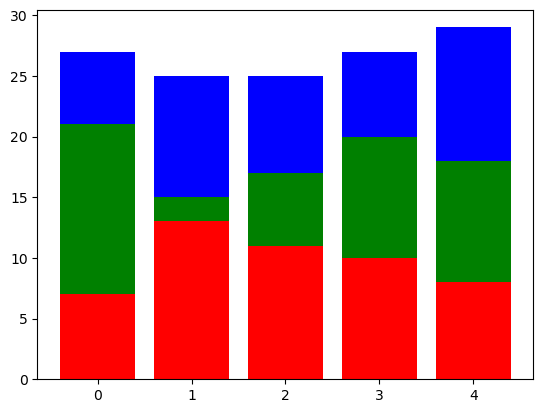

In [125]:
A=np.random.randint(2,15,5)
B=np.random.randint(2,15,5)
C=np.random.randint(2,15,5)

plt.bar(range(5),A,fc='r',ec='none')
plt.bar(range(5),B,fc='g',ec='none',bottom=A)
plt.bar(range(5),C,fc='b',ec='none',bottom=A+B)

#### 橫放的長條圖

<BarContainer object of 5 artists>

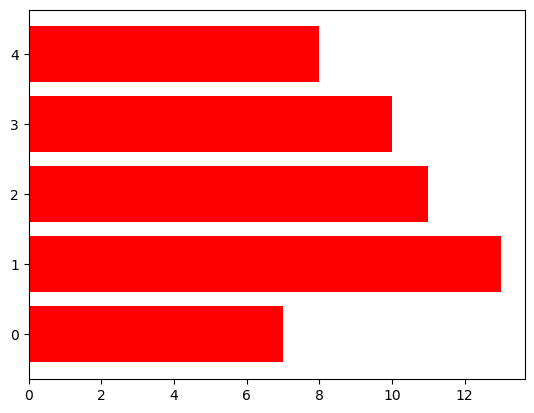

In [126]:
plt.barh(range(5),A,fc='r',ec='none')

#### 雙向的長條圖

<BarContainer object of 5 artists>

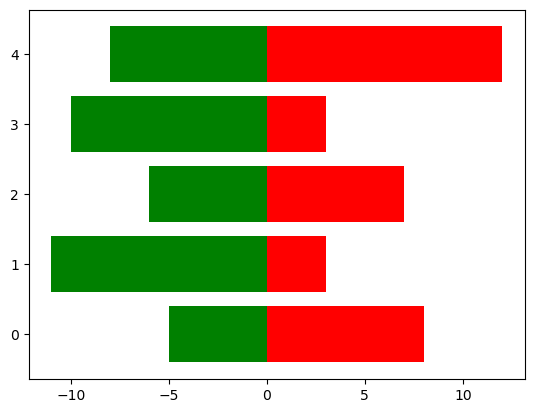

In [135]:
x=np.arange(5)
A=np.random.randint(2,15,5)
B=np.random.randint(2,15,5)
plt.barh(x,A,fc='r',ec='none')
plt.barh(x,-B,fc='g',ec='none')


## 9 畫圖區的設定*

#### 說明文字的標示

In [3]:
x=np.linspace(-2*np.pi,2*np.pi,200)
y=np.sin(x)

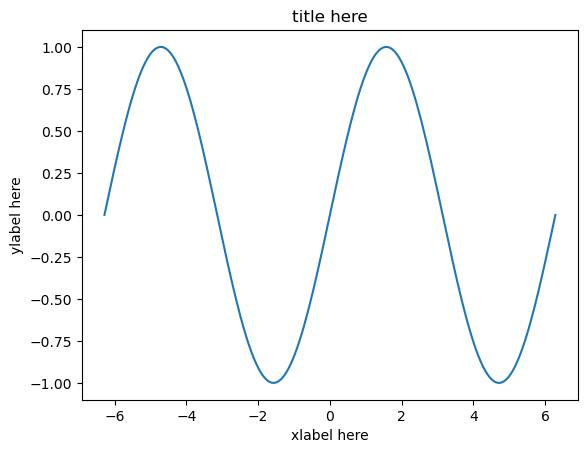

In [5]:

plt.title("title here")
plt.xlabel("xlabel here")
plt.ylabel("ylabel here")
plt.plot(x,y)


#### 邊界的設定

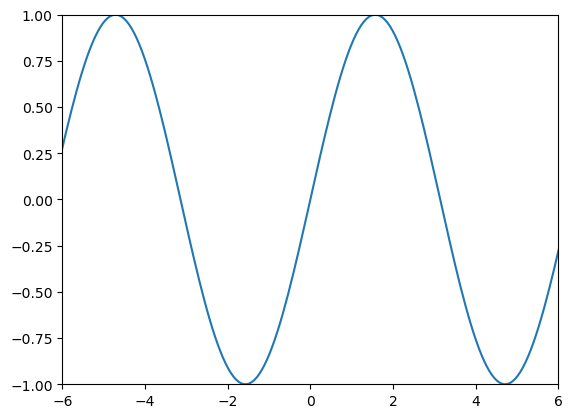

In [9]:
plt.xlim(-6,6)
plt.ylim(-1,1)
plt.plot(x,y)

#### xticks

([<matplotlib.axis.XTick at 0x171ae4710>,
 [Text(0.0, 0, '$0$'),
  Text(1.5707963267948966, 0, '$0.5\\pi$'),
  Text(3.141592653589793, 0, '$\\pi$'),
  Text(4.71238898038469, 0, '$1.5\\pi$'),
  Text(6.283185307179586, 0, '$2\\pi$')])

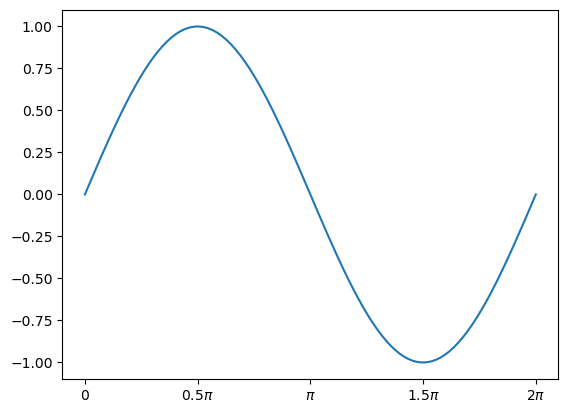

In [21]:
xv=np.linspace(0,2*np.pi,100)
yv=np.sin(xv)
plt.plot(xv,yv)
xticks_where=(np.pi/2)*np.array([0,1,2,3,4])
xticks_text=["$0$","$0.5\pi$","$\pi$","$1.5\pi$","$2\pi$"]
plt.xticks(xticks_where,xticks_text)

In [20]:
np.array([0,1,2,3,4])

array([0, 1, 2, 3, 4])

# [練習]自己生成測試數據，X軸xticks對應到y軸數值

例如: 1,2,3,4,5 對應X軸 '甲','乙'...

#### 圖例 legend

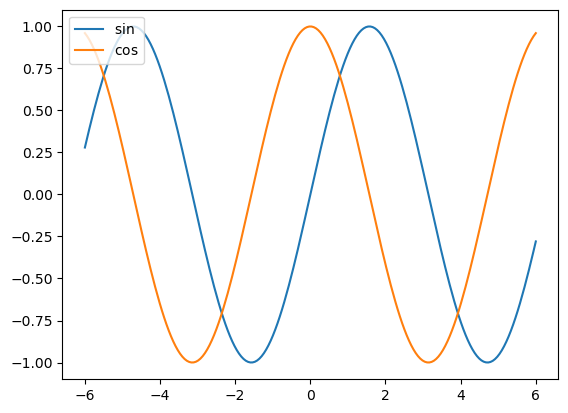

In [29]:
x=np.linspace(-6,6,200)
y_sin=np.sin(x)
y_cos=np.cos(x)
plt.plot(x,y_sin,label="$\sin$")
plt.plot(x,y_cos,label="$\cos$")
plt.legend(loc=2)

可用 `loc` 去設圖例的位置, 依 1, 2, 3, ... 表示。

## 10 取得現在工作中 axes*

我們有時要設 axes 的背景啦等等的資訊。這時就要取得現在工作中的 axes。這一般有兩種方式, 第一種是設 `subplot` 時可以取得:

    fig, ax = plt.subplot()
    
另一種是用 `gca` 函數:

    ax = plt.gca()

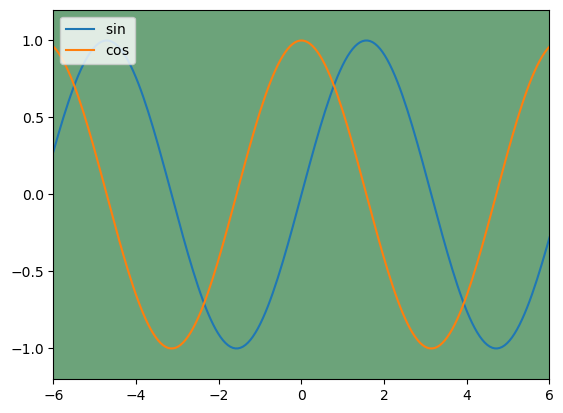

In [32]:
ax=plt.gca()
ax.set_facecolor("#6ca37a")
ax.set_xlim(-6,6)
ax.set_ylim(-1.2,1.2)
x=np.linspace(-6,6,200)
y_sin=np.sin(x)
y_cos=np.cos(x)
plt.plot(x,y_sin,label="$\sin$")
plt.plot(x,y_cos,label="$\cos$")
plt.legend(loc=2)

#### 移動 x, y 座標軸

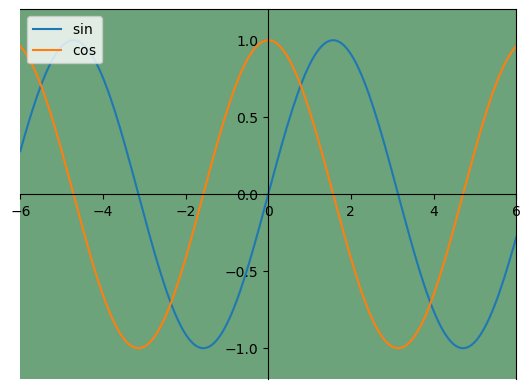

In [34]:
ax=plt.gca()
ax.set_facecolor("#6ca37a")
ax.set_xlim(-6,6)
ax.set_ylim(-1.2,1.2)
ax.spines['bottom'].set_position(('data',0))
ax.spines['left'].set_position(('data',0))
x=np.linspace(-6,6,200)
y_sin=np.sin(x)
y_cos=np.cos(x)
plt.plot(x,y_sin,label="$\sin$")
plt.plot(x,y_cos,label="$\cos$")
plt.legend(loc=2)

matplotlib.spines.Spines

## 11 耍寶可愛的 `xkcd`*

findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd S

findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family 'xkcd' not found.
findfont: Font family 'xkcd Script' not found.
findfont: Font family 'Comic Neue' not found.
findfont: Font family '

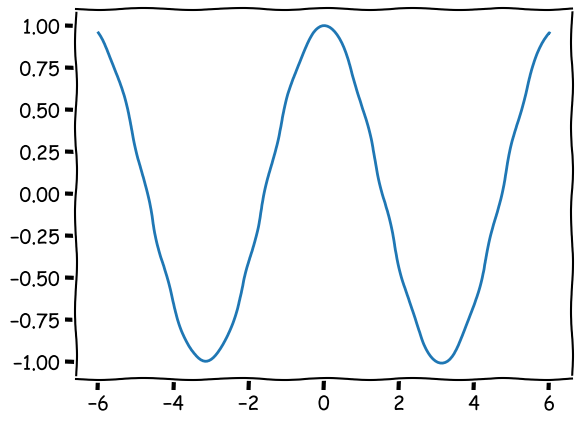

In [45]:
#xkcd not working
plt.xkcd()
plt.plot(x,y_cos)
#change back to default (not xkcd)
plt.rcdefaults()

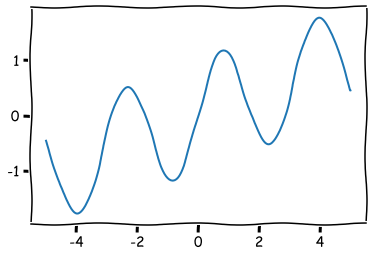

## 12 `seaborn` 大救星

雖然 `matplotlib` 幾乎什麼都可以調, 但有些簡單的調整卻要花費很多時間。於是有了許多可以協助 `matplotlib` 變美、變方便的套件出現。最近有個很有名的叫 `seaborn`, 儼然有另一個標準套件的態式。

最重要的是 `seaborn` 和我們未來要介紹的 `pandas` 配合得非常好, 雖然熊貓和海生的聽來就沒什麼關係...

我們先來個標準 (又來標準縮寫) 讀入 `seaborn` 的方法。

In [43]:
import seaborn as sns

然後像平常畫個圖。

In [47]:
sns.set(color_codes=True)

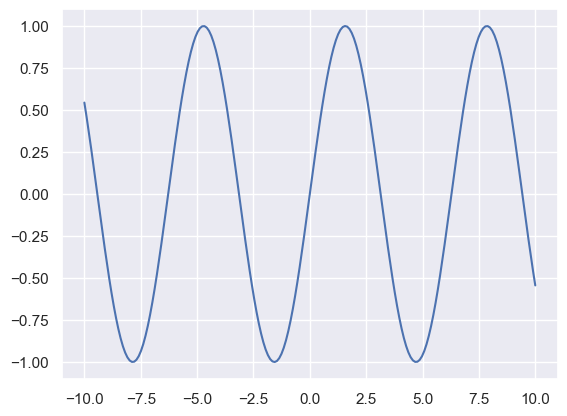

In [48]:
x=np.linspace(-10,10,200)
y=np.sin(x)
plt.plot(x,y)

傑克, 這真是太神奇了!

總之, 你根本就直接用原來 `matplotlib` 的指令, 馬上 `seaborn` 就會幫你美化。當然我們還是可以做更多的控制, 詳情請參考

[seaborn 的網站](https://seaborn.github.io/)